In [1]:
from functions import *
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use(plt.style.available[5])

# 6.1. Color space


6.1.1. Convert Lena to HSI format, and display the HIS components as separate grayscale images. Observe these 
images to comment on what does each of the H, S, I components represent. The HSI images should be saved in 
double precision.


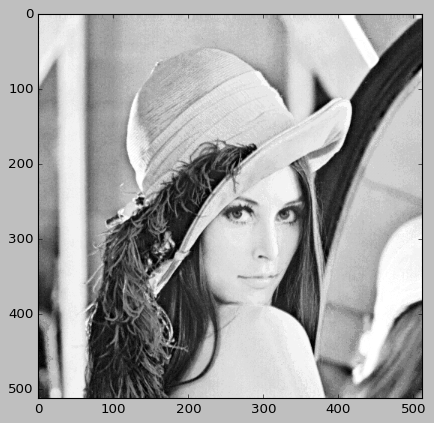

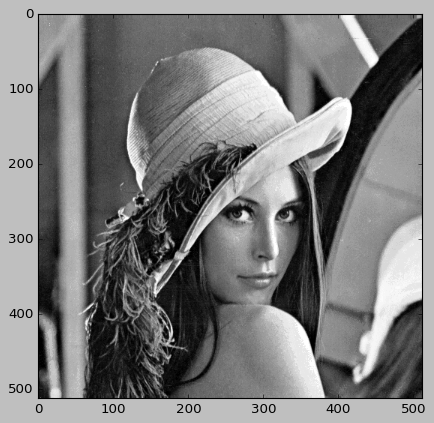

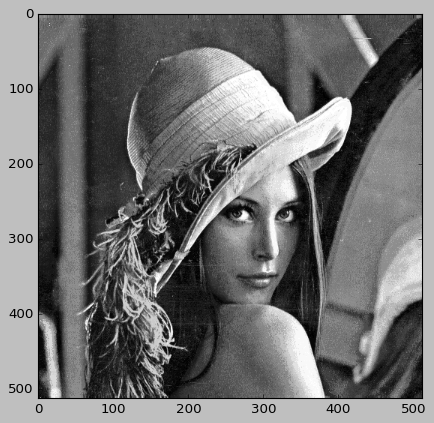

[[2.9695102e-03 2.9695102e-03 3.0023064e-03 ... 2.7741860e-03
  2.9416957e-03 3.0251392e-03]
 [2.9695102e-03 2.9695102e-03 3.0023064e-03 ... 2.7741860e-03
  2.9416957e-03 3.0251392e-03]
 [2.9695102e-03 2.9695102e-03 3.0023064e-03 ... 2.7741860e-03
  2.9416957e-03 3.0251392e-03]
 ...
 [5.5377831e+00 5.5377831e+00 5.5355415e+00 ... 5.5341558e+00
  5.5340753e+00 5.5341406e+00]
 [5.5377831e+00 5.5377831e+00 5.5369534e+00 ... 5.5340753e+00
  5.5340753e+00 5.5340743e+00]
 [5.5377831e+00 5.5377831e+00 5.5369534e+00 ... 5.5340753e+00
  5.5340753e+00 5.5340743e+00]]
[[0.24072012 0.24072012 0.2157345  ... 0.25029433 0.30592716 0.34118894]
 [0.24072012 0.24072012 0.2157345  ... 0.25029433 0.30592716 0.34118894]
 [0.24072012 0.24072012 0.2157345  ... 0.25029433 0.30592716 0.34118894]
 ...
 [0.794365   0.794365   0.7373958  ... 0.46858817 0.4587883  0.5264993 ]
 [0.794365   0.794365   0.7114392  ... 0.44100043 0.44100043 0.45077226]
 [0.794365   0.794365   0.7114392  ... 0.44100043 0.44100043 0.450

In [2]:
lena = cv2.imread('Lena.bmp')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)


red,green,blue = cv2.split(lena)
# red = np.where(red<50 , 0,red)
# green = np.where(green<50 , 0,green)
# blue = np.where(blue<50 , 0,blue)

# red = np.where(red>200 , 255,red)
# green = np.where(green>200 , 255,green)
# blue = np.where(blue>200 , 255,blue)

plt.imshow(red,cmap='gray')
plt.show()
plt.imshow(green,cmap='gray')
plt.show()
plt.imshow(blue,cmap='gray')
plt.show()

lena_abs = cv2.merge((red,green,blue))
lena_hsv = cv2.cvtColor(lena_abs,cv2.COLOR_BGR2HLS)
# hue = np.where(blue>green, 255,0)
# plt.imshow(lena_abs)
# plt.show()


h,s,i = RGB2HSI(lena_abs)
h = normalize(h,(math.pi*2),0)
s = normalize(s,1,0)
# i = normalize(i,255,0)
lena_hsi = cv2.merge((h,s,i))

print(h)
print(s)
print(i)

# plt.imshow(lena_hsi)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


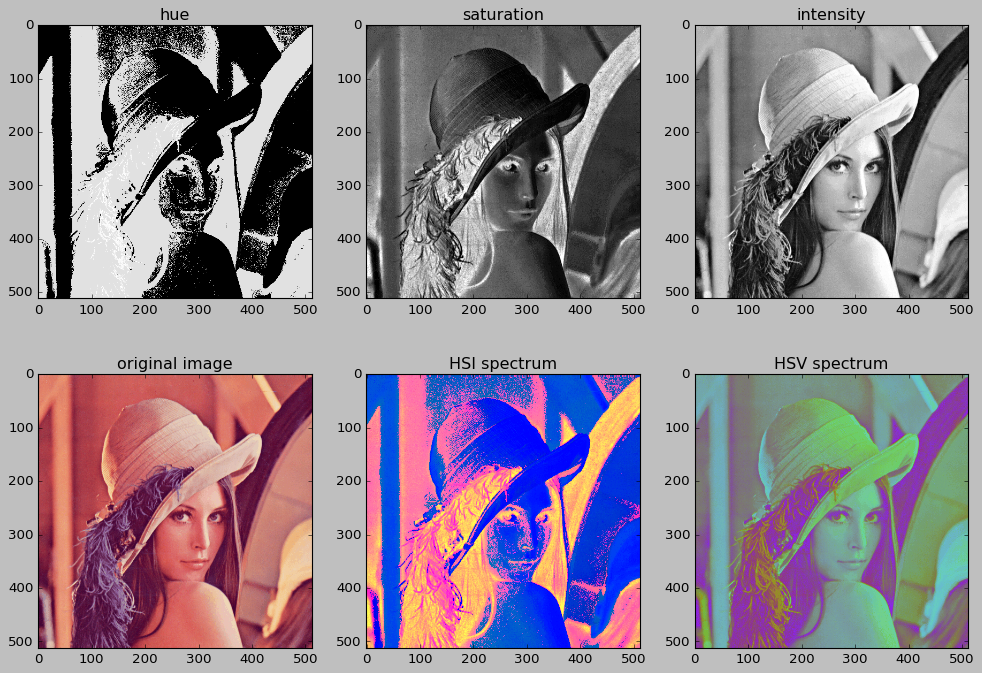

In [3]:

figure = plt.figure(figsize=(15,10))

figure.add_subplot(2,3,1)
plt.imshow(h,cmap='gray')
plt.title('hue',color='black')
# plt.show()

figure.add_subplot(2,3,2)
plt.imshow(s,cmap='gray')
plt.title('saturation',color='black')

figure.add_subplot(2,3,3)
plt.imshow(i,cmap='gray')
plt.title('intensity',color='black')

figure.add_subplot(2,3,4)
ha,la,sa = cv2.split(lena_abs)
plt.imshow(lena_abs)
plt.title('original image',color='black')

figure.add_subplot(2,3,5)
plt.imshow(lena_hsi)
plt.title('HSI spectrum',color='black')

figure.add_subplot(2,3,6)
plt.imshow(lena_hsv)
plt.title('HSV spectrum',color='black')

plt.show()


6.1.2. *Present and discuss new color space (at least three) in detail which was not introduced in class (Application, 
Equation, etc.). 

# 6.2. Quantization

In [4]:
from functions import *
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use(plt.style.available[5])

6.2.1. Implement uniform quantization of a color image. Your program should do the following: 
1. Read a grayscale image into an array.
2. Quantize and save the quantized image in a different array.
3. Compute the MSE and PSNR between the original and quantized images.
4. Display and print the quantized image. 

Notice, your program should assume the input values are in the range of (0,256), but allow you to vary the 
reconstruction level. Record the MSE and PSNR obtained with 𝐿 = 64, 32, 16, 8 and display the quantized images 
with corresponding 𝐿 values. Comment on the image quality as you vary 𝐿. (Test on Lena Image).

In [5]:
lena = cv2.imread('Lena.bmp',cv2.IMREAD_GRAYSCALE)

lena64 = quantize(lena.copy(),6)
lena32 = quantize(lena.copy(),5)
lena16 = quantize(lena.copy(),4)
lena8 = quantize(lena.copy(),3)

Text(0.5, 1.0, 'lena8')

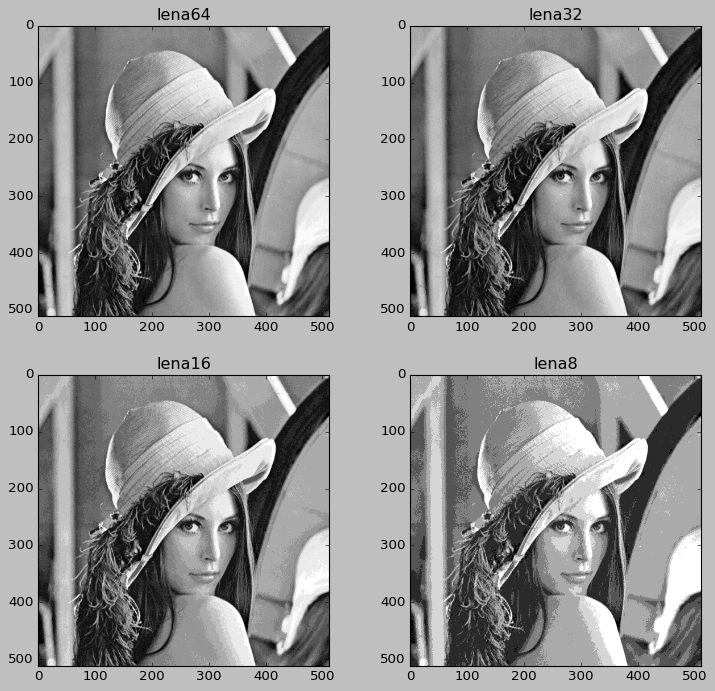

In [6]:
figure = plt.figure(figsize=(11,10))

figure.add_subplot(2,2,1)
plt.imshow(lena64,cmap='gray')
plt.title('lena64',color='black')

figure.add_subplot(2,2,2)
plt.imshow(lena32,cmap='gray')
plt.title('lena32',color='black')

figure.add_subplot(2,2,3)
plt.imshow(lena16,cmap='gray')
plt.title('lena16',color='black')

figure.add_subplot(2,2,4)
plt.imshow(lena8,cmap='gray')
plt.title('lena8',color='black')



In [7]:
print(f'L=64: PSNR= {PSNR(srcImage=lena,testImage=lena64)}, MSE= {mean_square_error(imageSource=lena,imagetarget=lena64)}')
print(f'L=32: PSNR= {PSNR(srcImage=lena,testImage=lena32)}, MSE= {mean_square_error(imageSource=lena,imagetarget=lena32)}')
print(f'L=16: PSNR= {PSNR(srcImage=lena,testImage=lena16)}, MSE= {mean_square_error(imageSource=lena,imagetarget=lena16)}')
print(f'L=8: PSNR= {PSNR(srcImage=lena,testImage=lena8)}, MSE= {mean_square_error(imageSource=lena,imagetarget=lena8)}')


L=64: PSNR= 42.66330132120192, MSE= 3.521683
L=32: PSNR= 35.80317064962315, MSE= 17.090836
L=16: PSNR= 29.16343936072466, MSE= 78.838150
L=8: PSNR= 23.169236343419712, MSE= 313.441666


6.2.2. For the Lena image, quantize the R, G, and B components to 3, 3, and 2 bits, respectively, using a uniform 
quantizer. Display the original and quantized color image. Comment on the difference in color accuracy. 

In [8]:
lena = cv2.imread('Lena.bmp')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)
red,green,blue = cv2.split(lena)

newRed = quantize(red,3)
newGreen = quantize(green,3)
newBlue = quantize(blue,2)

lena_quantized = cv2.merge((newRed,newGreen,newBlue))



Text(0.5, 1.0, 'after quantization')

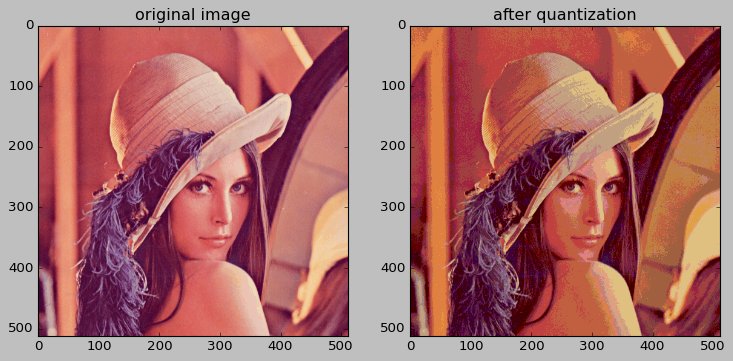

In [9]:

figure = plt.figure(figsize=(11,10))

figure.add_subplot(1,2,1)
plt.imshow(lena)
plt.title('original image',color='black')

figure.add_subplot(1,2,2)
plt.imshow(lena_quantized)
plt.title('after quantization',color='black')

6.2.3. We want to weave the Baboon image on a rug. To do so, we need to reduce the number of colors in the image 
with minimal visual quality loss. If we can have 32, 16 and 8 different colors in the weaving process, reduce the 
color of the image to these three special modes. Discuss and display the results.

Note: you can use immse and psnr for problem 6.2.

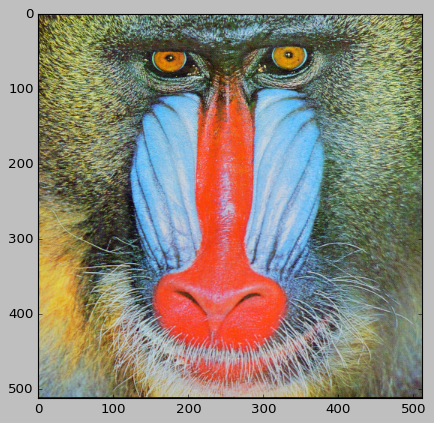

In [21]:
baboon = cv2.imread('baboon.bmp')
baboon = cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB)
red,green,blue = cv2.split(baboon)

plt.imshow(baboon)


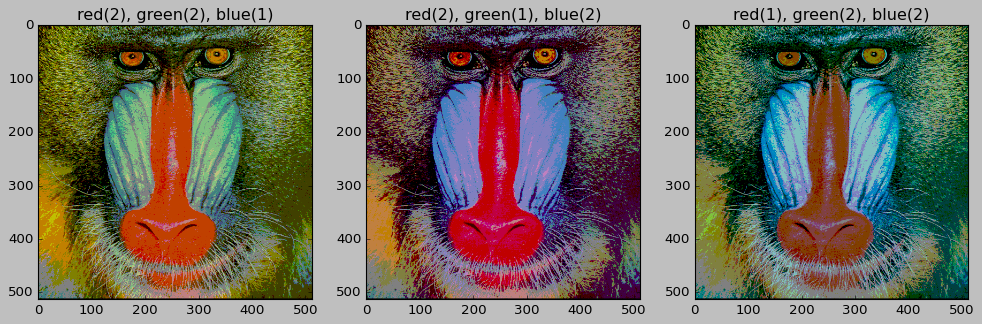

In [18]:
figure = plt.figure(figsize=(15,15))

# for 32 colors
newRed = quantize(red,2)
newGreen = quantize(green,2)
newBlue = quantize(blue,1)

baboon32colors = cv2.merge((newRed,newGreen,newBlue))

figure.add_subplot(1,3,1)
plt.imshow(baboon32colors)
plt.title('red(2), green(2), blue(1)',color='black')


newRed = quantize(red,2)
newGreen = quantize(green,1)
newBlue = quantize(blue,2)

baboon32colors = cv2.merge((newRed,newGreen,newBlue))

figure.add_subplot(1,3,2)
plt.imshow(baboon32colors)
plt.title('red(2), green(1), blue(2)',color='black')

newRed = quantize(red,1)
newGreen = quantize(green,2)
newBlue = quantize(blue,2)

baboon32colors = cv2.merge((newRed,newGreen,newBlue))

figure.add_subplot(1,3,3)
plt.imshow(baboon32colors)
plt.title('red(1), green(2), blue(2)',color='black')

plt.show()



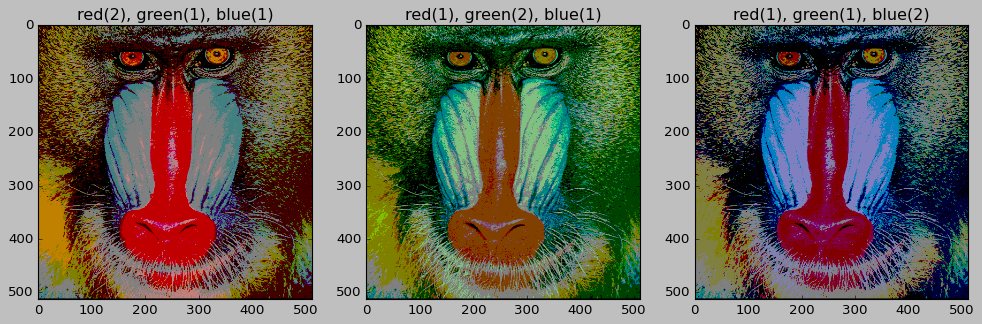

In [19]:
figure = plt.figure(figsize=(15,15))

# for 16 colors
newRed = quantize(red,2)
newGreen = quantize(green,1)
newBlue = quantize(blue,1)

baboon16colors = cv2.merge((newRed,newGreen,newBlue))

figure.add_subplot(1,3,1)
plt.imshow(baboon16colors)
plt.title('red(2), green(1), blue(1)',color='black')


newRed = quantize(red,1)
newGreen = quantize(green,2)
newBlue = quantize(blue,1)

baboon16colors = cv2.merge((newRed,newGreen,newBlue))

figure.add_subplot(1,3,2)
plt.imshow(baboon16colors)
plt.title('red(1), green(2), blue(1)',color='black')

newRed = quantize(red,1)
newGreen = quantize(green,1)
newBlue = quantize(blue,2)

baboon16colors = cv2.merge((newRed,newGreen,newBlue))

figure.add_subplot(1,3,3)
plt.imshow(baboon16colors)
plt.title('red(1), green(1), blue(2)',color='black')

plt.show()

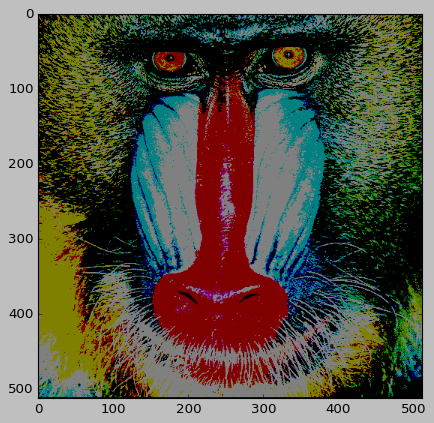

In [20]:
# for 8 colors
newRed = quantize(red,1)
newGreen = quantize(green,1)
newBlue = quantize(blue,1)

baboon8colors = cv2.merge((newRed,newGreen,newBlue))

plt.imshow(baboon8colors)